In [0]:
import os
import keras

os.environ['CUDA_VISIBLE_DEVICES']='0'

In [0]:
train,test=keras.datasets.cifar10.load_data()

In [0]:
def preproc_x(x,flatten=True):
  x=x/255.
  if flatten:
    x=x.reshape((len(x),-1))
  return x

def preproc_y(y,num_classes=10):
  if y.shape[-1]==1:
    y=keras.utils.to_categorical(y,num_classes)
  return y

In [0]:
x_train,y_train=train
x_test,y_test=test

x_train=preproc_x(x_train)
x_test=preproc_x(x_test)

y_train=preproc_y(y_train)
y_test=preproc_y(y_test)

In [0]:
from keras.layers import Dropout

def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128],drp_ratio=0.2):
  input_layer=keras.layers.Input(input_shape)

  for i,n_units in enumerate(num_neurons):
    if i==0:
      x=keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
      x=Dropout(drp_ratio)(x)
    else:
      x=keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
      x=Dropout(drp_ratio)(x)
  out=keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)

  model=keras.models.Model(inputs=[input_layer],output=[out])
  return model

In [0]:
LEARNING_RATE=1e-3
EPOCHS=50
BATCH_SIZE=256
MOMENTUM=0.95
Dropout_EXP=0.3

In [14]:
model=build_mlp(input_shape=x_train.shape[1:],drp_ratio=Dropout_EXP)
model.summary()
optimizer=keras.optimizers.Adam(lr=LEARNING_RATE,epsilon=None,decay=0.0)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)

train_loss=model.history.history['loss']
valid_loss=model.history.history['val_loss']
train_acc=model.history.history['acc']
valid_acc=model.history.history['val_acc']

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  from ipykernel import kernelapp as app





Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 14s 286us/step - loss: 2.0914 - acc: 0.2223 - val_loss: 1.8709 - val_acc: 0.3335
Epoch 2/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.9273 - acc: 0.2916 - val_loss: 1.8477 - val_acc: 0.3413
Epoch 3/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.8828 - acc: 0.3116 - val_loss: 1.7804 - val_acc: 0.3657
Epoch 4/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.8412 - acc: 0.3281 - val_loss: 1.7680 - val_acc: 0.3848
Epoch 5/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.8141 - acc: 0.3388 - val_loss: 1.7206 - val_acc: 0.3983
Epoch 6/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.7884 - acc: 0.3492 - val_loss: 1.7078 - val_acc: 0.3924
Epoch 7/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.7693 - acc: 0.3573 - val_

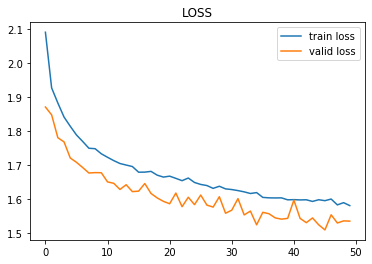

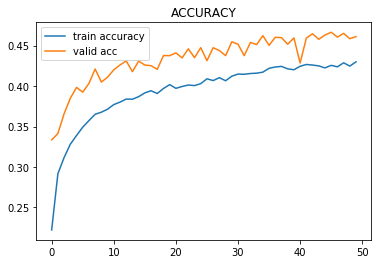

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)),train_loss,label='train loss')
plt.plot(range(len(valid_loss)),valid_loss,label='valid loss')
plt.legend()
plt.title('LOSS')
plt.show()

plt.plot(range(len(train_acc)),train_acc,label='train accuracy')
plt.plot(range(len(valid_acc)),valid_acc,label='valid acc')
plt.legend()
plt.title('ACCURACY')
plt.show()